## rudimentary timer test

In [19]:
import time
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [20]:
# test fibonacci func
def fib(n):
  if n <= 0:
    return n
  else:
    return fib(n-1) + fib(n-2)

In [21]:
# simple timer test
start = time.time()
fib(30)
diff = time.time() - start
print(f"took {diff}s")

took 0.25492405891418457s


100%|██████████| 39/39 [00:50<00:00,  1.29s/it] 


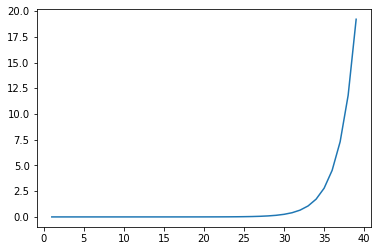

In [22]:
# plot for fib given larger seq
x, y = [], []
for i in tqdm(range(1, 40)):
  x.append(i)
  start = time.time()
  fib(i)
  y.append(time.time() - start)

plt.plot(x, y)
plt.show()

100%|██████████| 39/39 [00:00<00:00, 278667.56it/s]


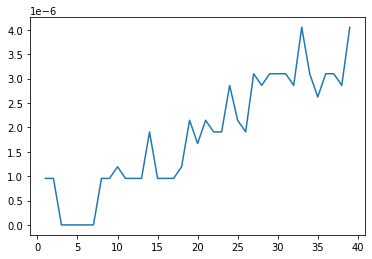

In [23]:
def fib_dp(n):
  if n <= 0:
    return n
  else:
    fibs = [0, 1]
    for i in range(2, n+1):
      fibs.append(fibs[i-1] + fibs[i-2])
    return fibs[n]

# plot for fib dp given larger seq
xdp, ydp = [], []
for i in tqdm(range(1, 40)):
  xdp.append(i)
  start = time.time()
  fib_dp(i)
  ydp.append(time.time() - start)

# plot vanilla and dp fib
# plt.plot(x, y)
plt.plot(xdp, ydp)
plt.show()


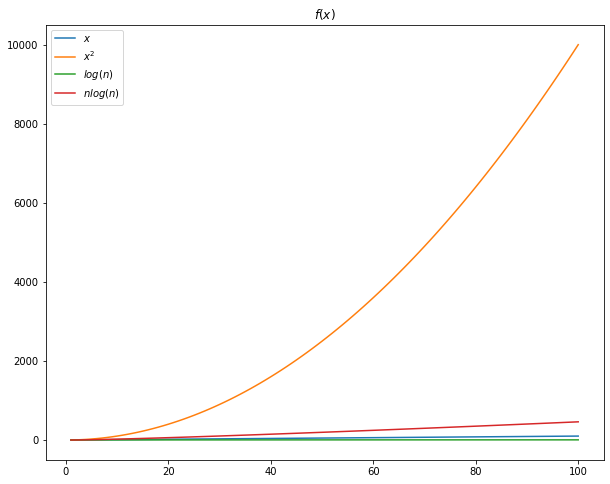

In [24]:
from math import log

# plot for baseline f(x)
x = np.linspace(1, 100, 100)
plt.figure(figsize=(10, 8))
plt.plot(x, [i for i in x], label="$x$")
plt.plot(x, [i**2 for i in x], label="$x^2$")
plt.plot(x, [log(i) for i in x], label="$log(n)$")
plt.plot(x, [i*log(i) for i in x], label="$nlog(n)$")
plt.legend()
plt.title("$f(x)$")
plt.show()

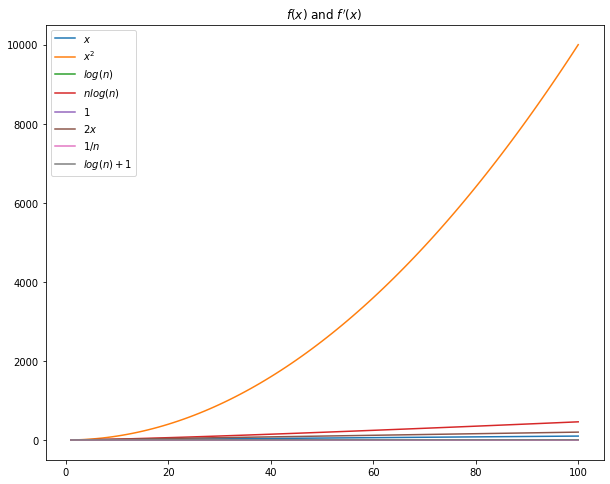

In [25]:
# plot for baseline f'(x)
from math import log

x = np.linspace(1, 100, 100)
plt.figure(figsize=(10, 8))
plt.plot(x, [i for i in x], label="$x$")
plt.plot(x, [i**2 for i in x], label="$x^2$")
plt.plot(x, [log(i) for i in x], label="$log(n)$")
plt.plot(x, [i*log(i) for i in x], label="$nlog(n)$")
plt.plot(x, [1 for i in x], label="$1$")
plt.plot(x, [2*i for i in x], label="$2x$")
plt.plot(x, [1/i for i in x], label="$1/n$")
plt.plot(x, [log(i)+1 for i in x], label="$log(n) + 1$")
plt.legend()
plt.title("$f(x)$ and $f'(x)$")
plt.show()

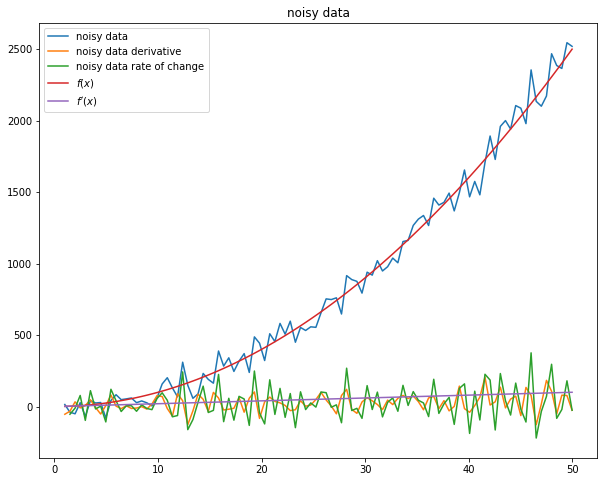

In [26]:
# create some sample data and add gausian noise
f_x = lambda x: x**2
f_prime_x = lambda x: 2*x
x = np.linspace(1, 50, 100)
y = [f_x(i) for i in x]
y += np.random.normal(0, 75, 100)

# plot noisy data and its derivative
plt.figure(figsize=(10, 8))
plt.plot(x, y, label="noisy data")
plt.plot(x, np.gradient(y), label="noisy data derivative")
plt.plot(x[1:], [y[i+1]-y[i] for i in range(len(y)-1)], label="noisy data rate of change")
plt.plot(x, [f_x(i) for i in x], label="$f(x)$")
plt.plot(x, [f_prime_x(i) for i in x], label="$f'(x)$")
plt.legend()
plt.title("noisy data")
plt.show()


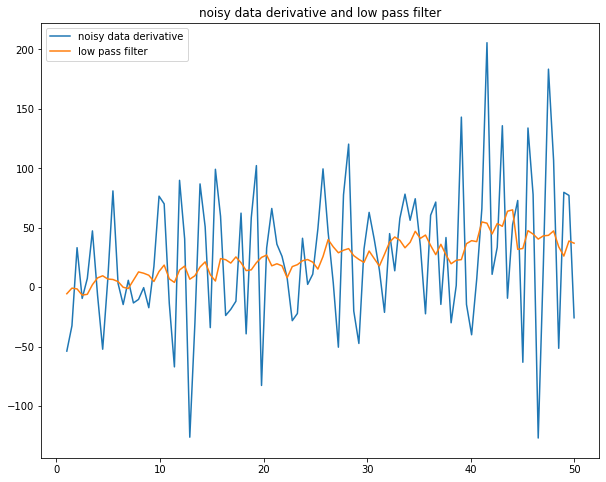

In [27]:
# plot derivative of noisy data and low pass filter
plt.figure(figsize=(10, 8))
plt.plot(x, np.gradient(y), label="noisy data derivative")
plt.plot(x, np.convolve(np.gradient(y), np.ones(10)/10, mode="same"), label="low pass filter")
plt.title("noisy data derivative and low pass filter")
plt.legend()
plt.show()

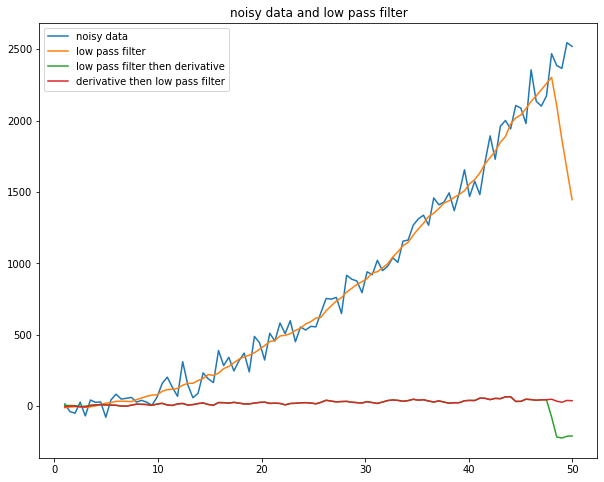

In [28]:
# performing low pass filter on raw data then taking derivative
plt.figure(figsize=(10, 8))
plt.plot(x, y, label="noisy data")
plt.plot(x, np.convolve(y, np.ones(10)/10, mode="same"), label="low pass filter")
plt.plot(x, np.gradient(np.convolve(y, np.ones(10)/10, mode="same")), label="low pass filter then derivative")
plt.plot(x, np.convolve(np.gradient(y), np.ones(10)/10, mode="same"), label="derivative then low pass filter")
plt.title("noisy data and low pass filter")
plt.legend()
plt.show()

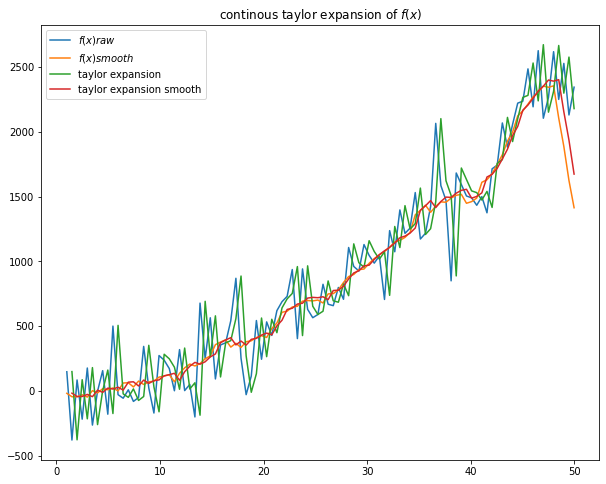

In [56]:
# return 2nd degree taylor expansion of f(x) at x0
def taylor_expansion(x0, y, f1, f2):
  return lambda x: y + f1(x0)*(x-x0) + f2(x0)*(x-x0)**2/2

# sample f(x), f'(x), and f''(x)
f = lambda x: x**2
f1 = lambda x: 2*x
f2 = lambda x: 2

# precomupte taylor expansions
x = np.linspace(1, 50, 100)
y = [f(i) for i in x] + np.random.normal(0, 200, 100)
ysmooth = np.convolve(y, np.ones(10)/10, mode="same")
yhat = [taylor_expansion(x[i], y[i], f1, f2)(x[i+1]) for i in range(len(x)-1)]
yhatsmooth = [taylor_expansion(x[i], ysmooth[i], f1, f2)(x[i+1]) for i in range(len(x)-1)]

# plot taylor expansion of f(x)
plt.figure(figsize=(10, 8))
plt.plot(x, y, label="$f(x) raw$")
plt.plot(x, ysmooth, label="$f(x) smooth$")
plt.plot(x[1:], yhat, label="taylor expansion")
plt.plot(x[1:], yhatsmooth, label="taylor expansion smooth")
plt.legend()
plt.title("continous taylor expansion of $f(x)$")
plt.show()

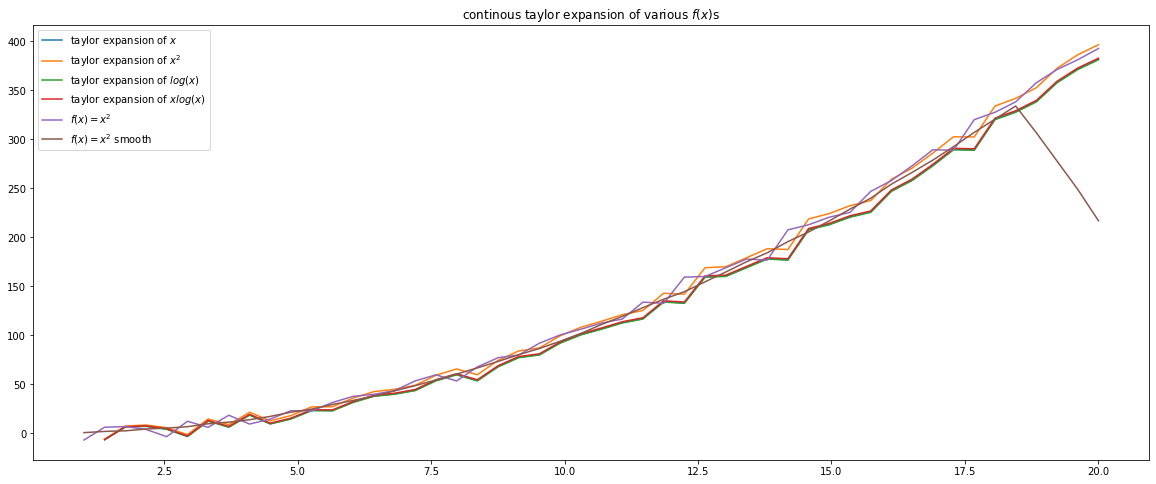

In [95]:
# define dictionary of f(x), f'(x), and f''(x)
f_x = {
  "$x$": (lambda x: x, lambda x: 1, lambda x: 0),
  "$x^2$": (lambda x: x**2, lambda x: 2*x, lambda x: 2),
  # "$x^3$": (lambda x: x**3, lambda x: 3*x**2, lambda x: 6*x),
  "$log(x)$": (lambda x: log(x), lambda x: 1/x, lambda x: -1/x**2),
  "$xlog(x)$": (lambda x: x*log(x), lambda x: log(x) + 1, lambda x: 1/x),
  # "$2^x$": (lambda x: 2**x, lambda x: log(2)*2**x, lambda x: log(2)**2*2**x)
}

# faux data
x = np.linspace(1, 20, 50)
y = [f(i) for i in x] + np.random.normal(0, 5, 50)
ys = np.convolve(y, np.ones(10)/10, mode="same")

# plot taylor expansion of f(x)
plt.figure(figsize=(20, 8))
for i in f_x.keys():
  f1, f2 = f_x[i][1], f_x[i][2]
  yhat = [taylor_expansion(x[i], y[i], f1, f2)(x[i+1]) for i in range(len(x)-1)]
  plt.plot(x[1:], yhat, label=f"taylor expansion of {i}".format(i))
plt.plot(x, y, label="$f(x)=x^2$")
plt.plot(x, ys, label="$f(x)=x^2$ smooth")
plt.legend()
plt.title("continous taylor expansion of various $f(x)$s")
plt.show()


In [96]:
# calculate the total loss for each taylor expansion
# print the taylor expansion with the lowest loss
losses = {}
for i in f_x.keys():
  f1, f2 = f_x[i][1], f_x[i][2]
  yhat = [taylor_expansion(x[i], y[i], f1, f2)(x[i+1]) for i in range(len(x)-1)]
  losses[i] = sum([abs(yhat[i]-y[i+1]) for i in range(len(yhat))])
print(min(losses, key=losses.get))

$x^2$


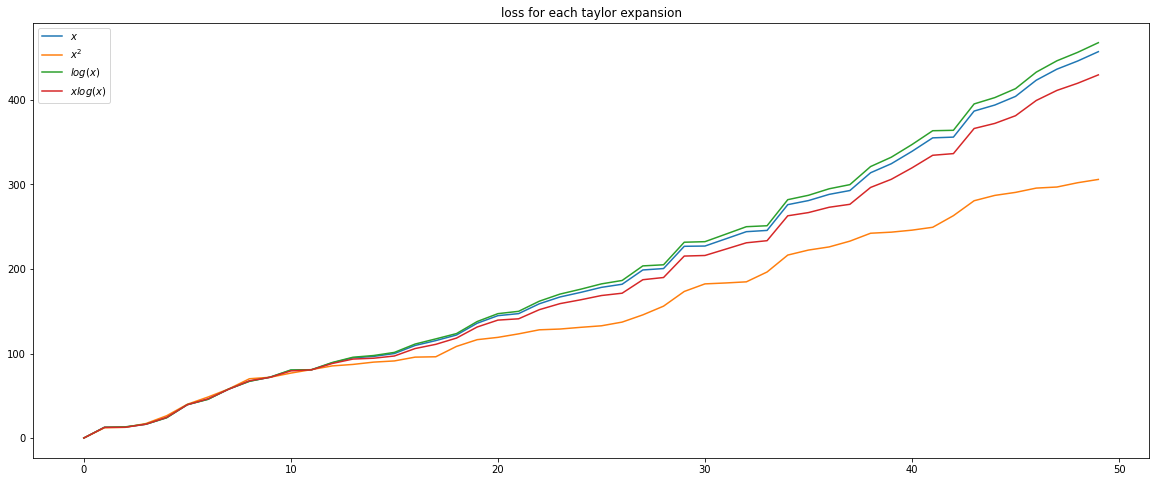

In [99]:
# now calculate loss for each taylor expansion at every point
# plot the loss for each taylor expansion
losses = {}
for i in f_x.keys():
  f1, f2 = f_x[i][1], f_x[i][2]
  losses[i] = [0]
  for j in range(len(x)-1):
    yhat = taylor_expansion(x[j], y[j], f1, f2)(x[j+1])
    losses[i].append(abs(yhat-y[j+1])+losses[i][-1])
plt.figure(figsize=(20, 8))
for i in losses.keys():
  plt.plot(losses[i], label=i)
plt.legend()
plt.title("loss for each taylor expansion")
plt.show()
